In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from  tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from  tensorflow.keras.models import Model

In [ ]:
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train, x_test = x_train/255, x_test/255

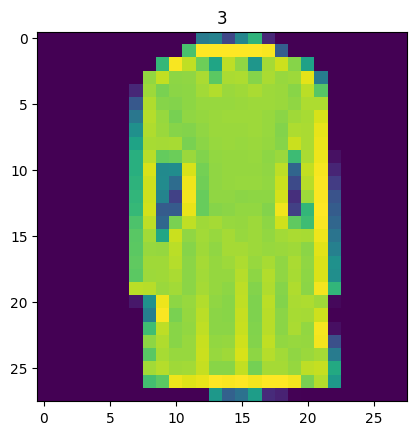

In [ ]:
num=np.random.randint(x_train.shape[0])
plt.imshow(x_train[num])
plt.title(f"{y_train[num]}")
plt.show()

In [ ]:
########### Recuerda que los datos de matrices bidimensionales y las convoluciones ocupan una dimension más
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)


In [ ]:
k=len(set(y_train))

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
#x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
#x = Dropout(0.2)(x)
x = Dense(k, activation="softmax")(x)
model = Model(i, x)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
r=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4874 - accuracy: 0.8215 - val_loss: 0.4156 - val_accuracy: 0.8431
Epoch 2/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3311 - accuracy: 0.8754 - val_loss: 0.3350 - val_accuracy: 0.8732
Epoch 3/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2812 - accuracy: 0.8946 - val_loss: 0.3273 - val_accuracy: 0.8827
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2442 - accuracy: 0.9083 - val_loss: 0.2948 - val_accuracy: 0.8982
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2161 - accuracy: 0.9175 - val_loss: 0.3120 - val_accuracy: 0.8926
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1879 - accuracy: 0.9279 - val_loss: 0.3148 - val_accuracy: 0.8943
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1637 - accuracy: 0.9374 - val_loss: 0.3250 -

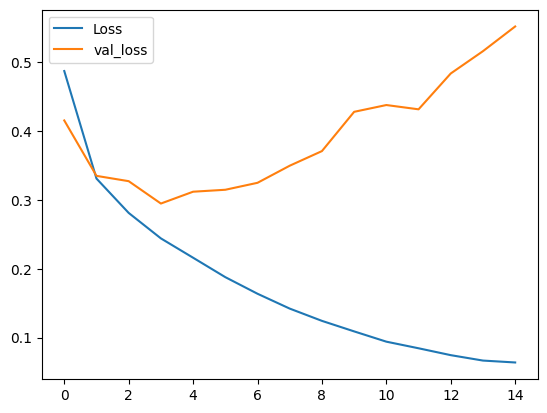

In [ ]:
plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

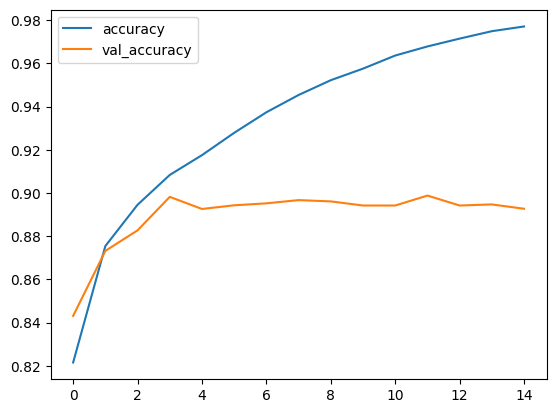

In [ ]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5521 - accuracy: 0.8927


[0.552115797996521, 0.8927000164985657]

In [ ]:
predic=model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
classes=predic.argmax(axis=1)

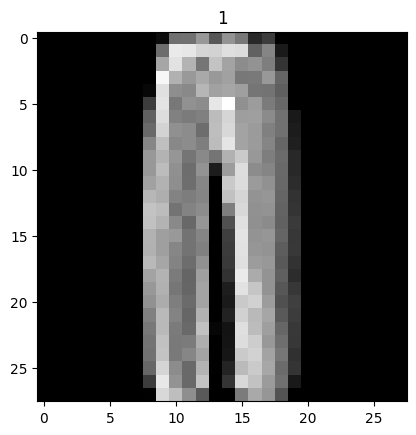

In [ ]:
num=np.random.randint(10000)

plt.imshow(x_test[num], cmap="gray")
plt.title(f"{classes[num]}")
plt.show()